Student Details

Name: Fergus Mc Hale

ID: 18203485

# Lab 4: Comparison of Classifiers

## A. Preparation

### Import Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from scipy import interp

### Import evaluation and plotting functions

In [2]:
%run ./Lab4_18203485Functions.ipynb

### Load and prepare the dataset for training and evaluating a classifier
Feel free to apply any other pre-processing technique at this point.

In [3]:
lab4_df = pd.read_csv("./loans_et4.csv")
lab4_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [4]:
# target attribute
target = lab4_df['Loan_Status']

# predictor attributes
predictors = lab4_df.drop('Loan_Status', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [5]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

## B. Evaluation and Comparison of Classifiers

### Train a Probablistic SVM Classifier

In [6]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(gamma='auto', probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, prec_SVM, rec_SVM, pr_score_SVM = evaluate_classifier(folds=5, 
                                                                                                         p=predictors, 
                                                                                                         t=target, 
                                                                                                         classifier=SVM_classifier, 
                                                                                                         mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

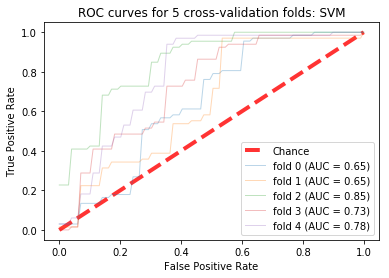

In [7]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

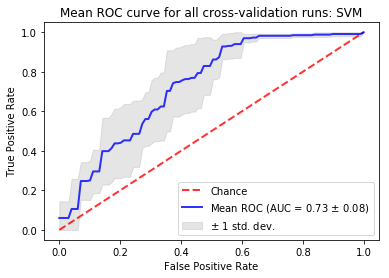

In [8]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

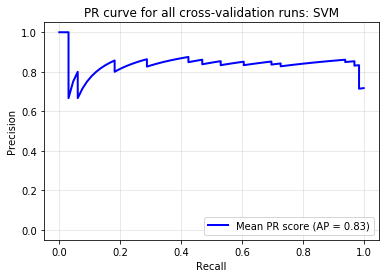

In [9]:
plot_precision_recall_mean(prec_SVM, rec_SVM, pr_score_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [10]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB , prec_NB, rec_NB, pr_score_NB = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

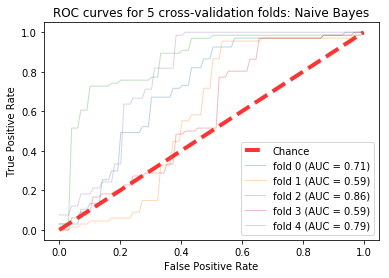

In [11]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

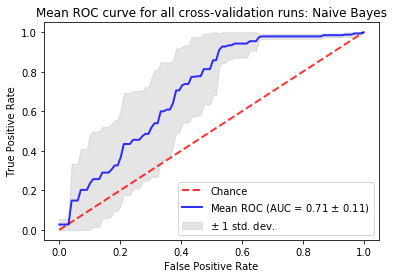

In [12]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

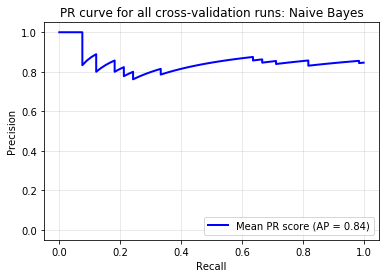

In [13]:
plot_precision_recall_mean(prec_NB, rec_NB, pr_score_NB, 'Naive Bayes')

### Compare All Trained Classifiers

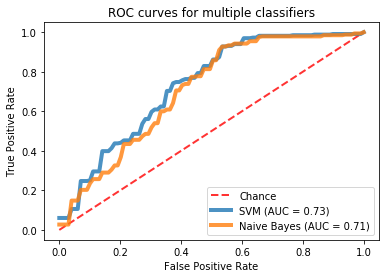

In [14]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB)]), 
                              np.array(['SVM', 'Naive Bayes']))

In [15]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB })

In [16]:
accuracies_df.describe()

,SVM,Naive Bayes
count,5.000000,5.000000
mean,0.808403,0.791670
std,0.029567,0.053465
min,0.778947,0.715789
25%,0.783505,0.762887
50%,0.812500,0.804124
75%,0.814433,0.822917
max,0.852632,0.852632


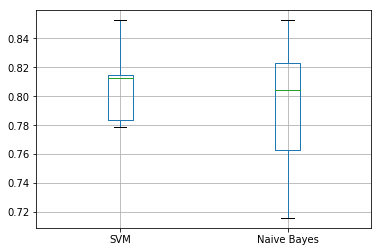

In [17]:
accuracies_df.boxplot()

In [18]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB})

In [19]:
f1_scores_df.describe()

,SVM,Naive Bayes
count,5.000000,5.000000
mean,0.876278,0.860583
std,0.017193,0.036598
min,0.860927,0.808511
25%,0.860927,0.839161
50%,0.878378,0.872483
75%,0.878378,0.882759
max,0.902778,0.900000


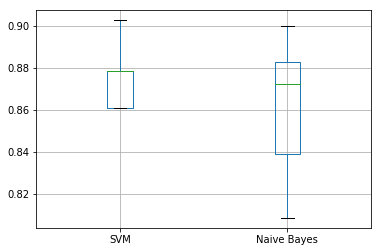

In [20]:
f1_scores_df.boxplot()

 # Task 1 (CS5062)
Watch the video playlist CS5062-E-tivity4 (ca. 40 min).
Read the article How and When to Use ROC Curves and Precision-Recall Curves for Classification in Python.
Use the following files (available in the GitLab repository):
Lab 4 - Comparison of Classifiers - Main.ipynb - This is the main example notebook to follow these two weeks. It contains code for training and evaluating SVM and Naïve Bayes classifiers.
Lab4_Functions.ipynb - This notebook contains some functions used in the man example notebook. They have been put in a separate file to keep the main notebook easier to follow.
seeds_dataset_binary.csv - This is the data set used in the main example notebook.
data set loans_et4.csv. This is a modified version of the loans data set with 1 for Loan_Status = Yes and 0 for Loan_Status = No. You are asked to work with this data set in Tasks 1-3.
Replicate the classifier training and evaluation demonstrated in the main example notebook Lab 4 - Comparison of Classifiers - Main.ipynb but with the data set loans_et4.csv and target attribute Loan_Status. Then train another probabilistic classifier with loans_et4.csv add compare it to both SVM and Naïve Bayes. For this third classifier, you can pick any scikit-learn probabilistic classification algorithm apart from SVM and Naive Nayes. Summarise your conclusions (max 150 words in a markdown cell).

# Selected Probablistic Classifier : LogisticRegression

In [21]:
K_FOLDS =5

In [22]:
LR_classifier = LogisticRegression()

accuracies_LR, f1_scores_LR, tprs_LR, aucs_LR , prec_LR, rec_LR, pr_score_LR = evaluate_classifier(folds=K_FOLDS, 
                                                                        p=predictors, t=target, 
                                                                        classifier=LR_classifier, 
                                                                        mean_fpr=mean_fpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

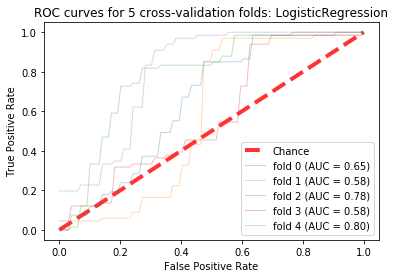

In [23]:
plot_roc_cv_folds(mean_fpr, tprs_LR, aucs_LR, 'LogisticRegression')

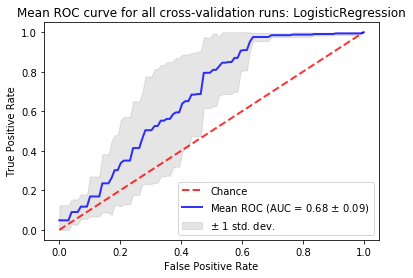

In [24]:
plot_roc_mean(mean_fpr, tprs_LR, aucs_LR, 'LogisticRegression')

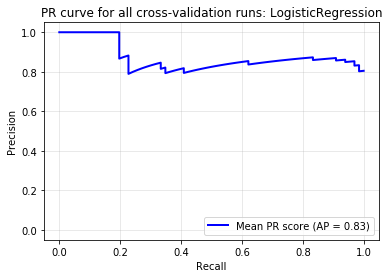

In [25]:
plot_precision_recall_mean(prec_LR, rec_LR, pr_score_LR, 'LogisticRegression')

# Train Multiple Classifiers

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier

# KNN
KNN_classifier = KNeighborsClassifier()

# Ensemble
AB_classifier = AdaBoostClassifier(n_estimators=100)

GB_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

RF_classifier = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2)

ET_classifier = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)


accuracies_Unknown, f1_scores_Unknown, tprs_Unknown, aucs_Unknown, prec_Unknown, rec_Unknown, pr_score_Unknown = evaluate_classifier(folds=5, 
                                                                                                  p=predictors, 
                                                                                                  t=target, 
                                                                                                  classifier=RF_classifier, 
                                                                                                  mean_fpr=mean_fpr)

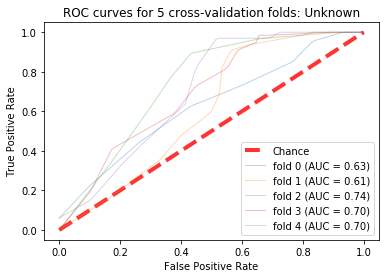

In [27]:
plot_roc_cv_folds(mean_fpr, tprs_Unknown, aucs_Unknown, 'Unknown')

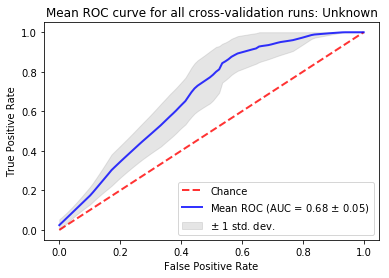

In [28]:
plot_roc_mean(mean_fpr, tprs_Unknown, aucs_Unknown, 'Unknown')

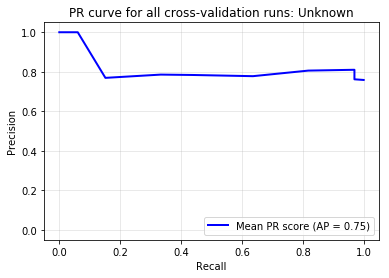

In [29]:
plot_precision_recall_mean(prec_Unknown, rec_Unknown, pr_score_Unknown, 'Unknown')

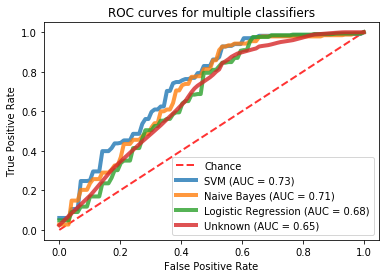

In [30]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0),
                                        np.mean(tprs_LR, axis=0), np.mean(tprs_Unknown, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), 
                                        np.mean(aucs_LR), np.mean(accuracies_Unknown)]), 
                              np.array(['SVM', 'Naive Bayes', 'Logistic Regression', 'Unknown']))

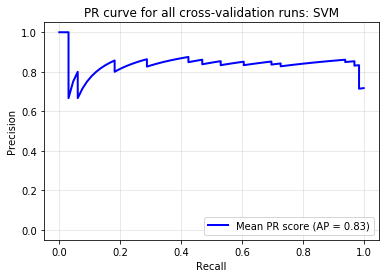

In [42]:
plot_precision_recall_mean(prec_SVM, rec_SVM, pr_score_SVM, 'SVM')

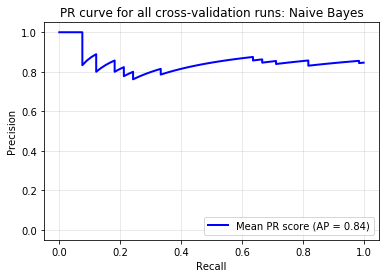

In [43]:
plot_precision_recall_mean(prec_NB, rec_NB, pr_score_NB, 'Naive Bayes')

In [31]:
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 
                                   'Naive Bayes' : accuracies_NB, 
                                   'Logistic Regression' : accuracies_LR, 
                                   'Unknown' : accuracies_Unknown})

In [32]:
accuracies_df.describe()

,SVM,Naive Bayes,Logistic Regression,Unknown
count,5.000000,5.000000,5.000000,5.000000
mean,0.808403,0.791670,0.808403,0.654481
std,0.029567,0.053465,0.029567,0.088722
min,0.778947,0.715789,0.778947,0.536082
25%,0.783505,0.762887,0.783505,0.621053
50%,0.812500,0.804124,0.812500,0.639175
75%,0.814433,0.822917,0.814433,0.705263
max,0.852632,0.852632,0.852632,0.770833


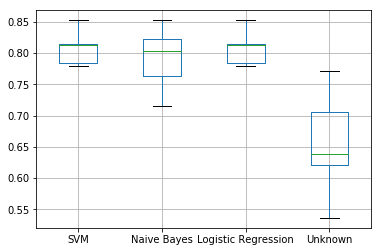

In [33]:
accuracies_df.boxplot()

In [34]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 
                                  'Naive Bayes' : f1_scores_NB, 
                                  'Logistic Regression' : f1_scores_LR, 
                                  'Unknown' : f1_scores_Unknown})

In [35]:
f1_scores_df.describe()

,SVM,Naive Bayes,Logistic Regression,Unknown
count,5.000000,5.000000,5.000000,5.000000
mean,0.876278,0.860583,0.876278,0.730341
std,0.017193,0.036598,0.017193,0.106506
min,0.860927,0.808511,0.860927,0.571429
25%,0.860927,0.839161,0.860927,0.700000
50%,0.878378,0.872483,0.878378,0.732824
75%,0.878378,0.882759,0.878378,0.794118
max,0.902778,0.900000,0.902778,0.853333


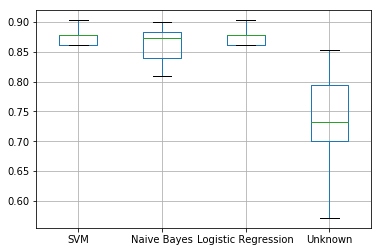

In [36]:
f1_scores_df.boxplot()

In [37]:
precision_df = pd.DataFrame(data={'SVM' : prec_SVM })

In [38]:
precision_df.describe()

,SVM
count,93.000000
mean,0.828328
std,0.054877
min,0.666667
25%,0.818182
50%,0.840909
75%,0.851351
max,1.000000


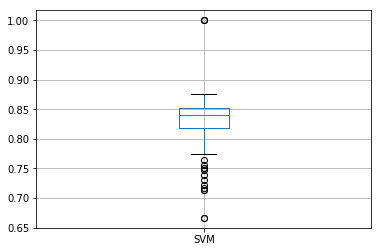

In [39]:
precision_df.boxplot()

# Task 1 Comment

* From the above f1 score both SVM and Logistic Regression both have the same score followed by Naived Bayes and Unknown ensemble algorithms.
* Based on accuries it is an split of all equals among SVM, Naived Bayes , Logistic Regression followed by Unknown ensemble algos
* Based on the False Positive Rate SVM is the most suitable
* But with the Percision Recall Naive Bayes is most suitable compared to SVM, Logistic Regression and ensemble based algos
* This is probably due to lower complexity in comparision to ensemble based methods

## C. Final Model

Assuming SVM was chosen, now we can train a final (to be potentially deployed) SVM model with the whole dataset:

In [ ]:
model = SVM_classifier.fit(predictors, target)

In [ ]:
new_seeds = np.array([[0.9,0.5,0.8,0.7,0.6,0.3,0.7,0.6,0.5,0.3,0.2], 
                      [0.1,0.2,0.3,0.001,0.005,0.001,0.002, 0.7,0.2,0.2,1.0], 
                      [0.7,0.3,0.2,3.0,0.2,0.3,0.2,0.3,0.2,0.3,0.2]])
new_seeds.shape

In [ ]:
# Exact prediction
np.round(model.predict_proba(new_seeds), 2)

In [ ]:
model.predict(new_seeds)

# Task 3 (CS5062)
Pick a winner among the classifiers you have trained with loans_et4.csv. Assume that it is important to minimise the false positives (i.e., Loan_Status predicted to be 1 wrongly). Look up the training parameters for this classifier on the scikit-learn website. For example, SVM has more than 10 parameters (see https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Experiment with the parameters and see if you can improve the model in terms of accuracy, precision, recall and AUC. You do not have to build a better model but to show that you have explored some of its training parameters. Summarise your experience with exploring the parameters (max 150 words in a markdown cell).

In [ ]:
hyper_parameters = {'C':[1,2,5,10,20,50,100],'gamma':[0.1,0.001,0.005,0.010,1,2,5,10,20,'scale'], 'kernel':['rbf','linear']}

# Using a SVM classifier
# The probabilty values need to be set as True to get the ROC curve
classifier = svm.SVC(probability=True)

# Using 4 fold cross-validation in grid search
model = GridSearchCV(classifier, hyper_parameters, cv=4, n_jobs=-1)
model.fit(predictors, target)

print("Best SVM classifier parameters:")
print(model.best_params_)
print()

# Task 3 Experiment with Params